# ----------------------------- Breast Cancer Diagnosis -----------------------------------

# Problem Statement

The goal of this project is to classify breast cancer tumors into malignant or benign
groups using the provided database and machine learning skills. In other words, we try to
predict the probability of a tumor being benign based on the historical data.

Dataset / Attribute Information:

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
dataset = pd.read_csv('wdbc.csv')

# Explore Dataset

> Lets check top 5 records from dataset

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> display dataset info to check numbers of entries (null / non-null) with their dtype

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

> numbers of rows and columns in dataset

In [5]:
dataset.shape

(569, 32)

> descibe dataset to check distribution of each numeric column with their total count, min, max, mean, std ..etc

In [6]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


> check missing values for each column (there is no missing value)

In [7]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> get the list of categorical columns

In [8]:
list(dataset.select_dtypes(include=['object']).columns)

['diagnosis']

> get the list of numerical columns

In [9]:
list(dataset.select_dtypes(exclude=['object']).columns)

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

> check the counts for Diagnosis (M = malignant, B = benign)

In [10]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

> check the correlation between the features

In [11]:
dataset.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


# Encoding Categorical Data

> Apply label encoding on target data

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset.iloc[:,1] = labelencoder.fit_transform(dataset.iloc[:,1].values)

# Data Visualisation

> plot counts for Diagnosis (1 -> M = malignant, 0 -> B = benign)

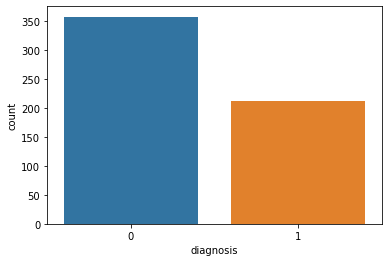

In [13]:
sns.countplot(dataset['diagnosis'])

> plot and analyse the relation between 2 features

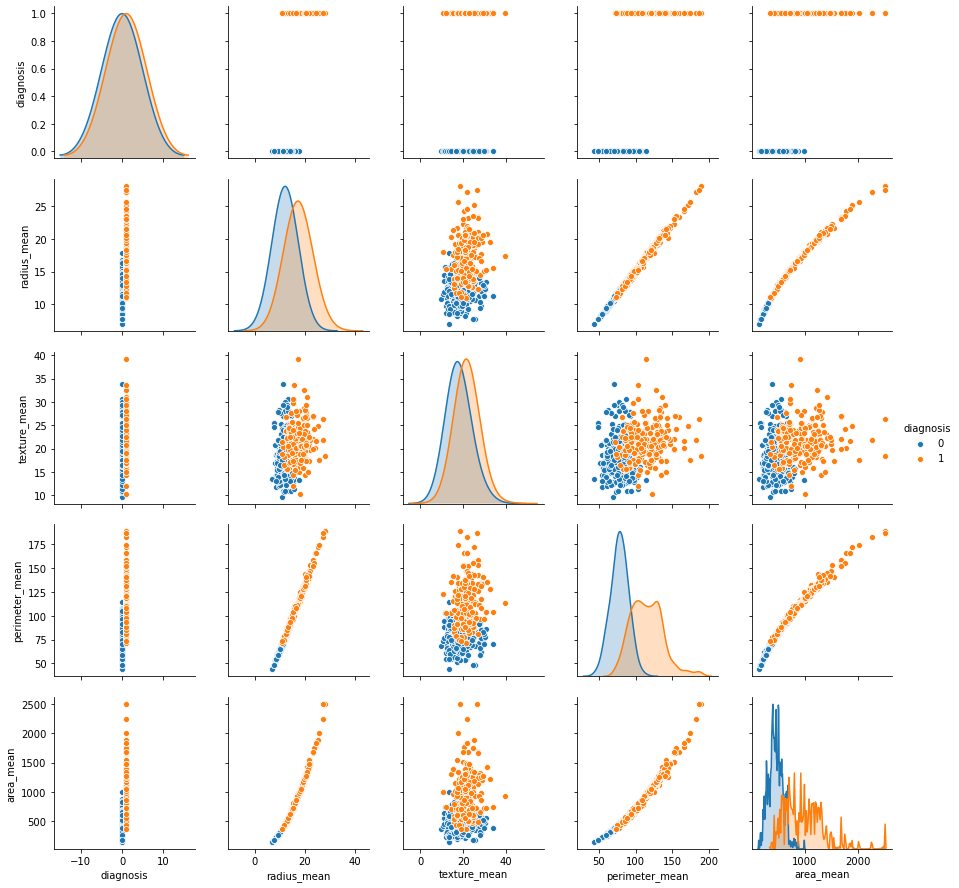

In [14]:
sns.pairplot(dataset.iloc[:,1:6], hue='diagnosis', diag_kws={'bw': 5})

> plot correlation between the features with heatmap

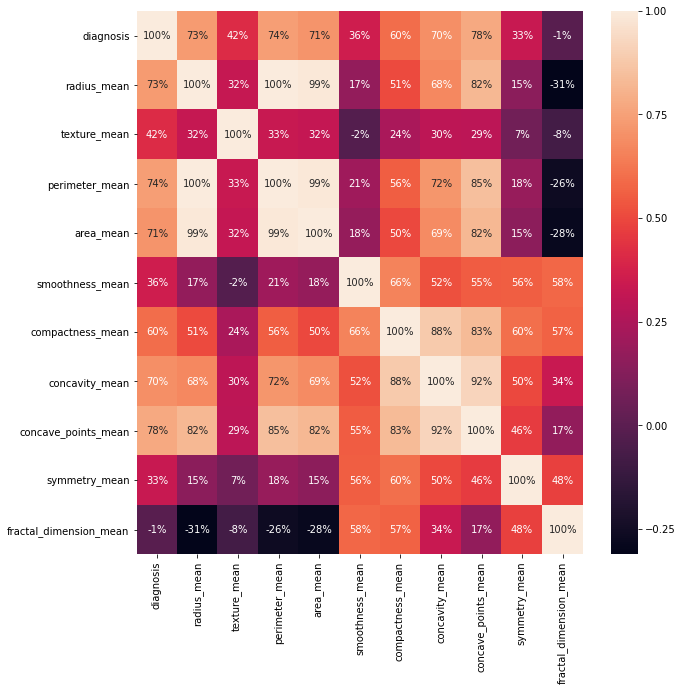

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,1:12].corr(), annot=True, fmt='.0%')

# Create Features And Traget Variables

In [16]:
X = dataset.iloc[:,2:].values
y = dataset.iloc[:,1].values

# Split Training And Test data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model Selection

> import libraries for different classification models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

> import libraries for evolution matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

> create funstion to check model accuracy

In [21]:
def modelaccuracy(classmodel):
    classifier = classmodel
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return [accuracy_score(y_test, y_pred), classifier.score(X_train, y_train)]

> check accuracy score for all classification model with default parameters

In [22]:
print("Accuracy Score on [Test Data, Training Data] (with all default parameters) :")
print(modelaccuracy(LogisticRegression()))
print(modelaccuracy(SVC()))
print(modelaccuracy(DecisionTreeClassifier()))
print(modelaccuracy(RandomForestClassifier()))
print(modelaccuracy(KNeighborsClassifier()))
print(modelaccuracy(GaussianNB()))
print(modelaccuracy(GradientBoostingClassifier()))

Accuracy Score on [Test Data, Training Data] (with all default parameters) :
[0.956140350877193, 0.989010989010989]
[0.9824561403508771, 0.9846153846153847]
[0.9298245614035088, 1.0]
[0.956140350877193, 1.0]
[0.9649122807017544, 0.978021978021978]
[0.9385964912280702, 0.9472527472527472]
[0.956140350877193, 1.0]


> From above scores we found that there are 2 classification models who perfomed very accurate on training data and have good score on test data : RandomForest and GradientBoosting

> lets select RandomForest and perform some cross validation and parameter tuning to imrpove model accuracy on test data

# Learning Curve

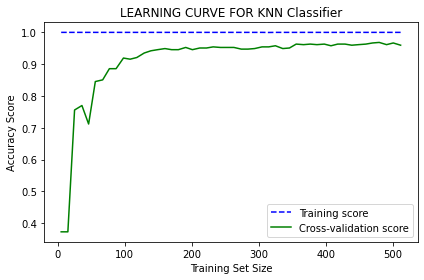

In [23]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR KNN Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

# Parameter Tuning

In [24]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
parameters = [{'n_estimators': [25, 50, 75, 100], 'criterion': ['entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.71 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 80, 'n_estimators': 25}


# Selected Model With Best Parameters

In [25]:
classifier = RandomForestClassifier(n_estimators=25, criterion='entropy', max_depth=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
[accuracy_score(y_test, y_pred), classifier.score(X_train, y_train)]

[0.956140350877193, 1.0]

> After parameter tuning we got 97.36% accuracy on test data without loosing the sore of training data

# Evolution Matrix

> Confusion matrix (Only 3 wrong prediction out of 114 : Good job)

In [26]:
print(confusion_matrix(y_test, y_pred))

[[65  2]
 [ 3 44]]


> Accuracy Score (Accuracy score is 97.36% : Good job)

In [27]:
print(accuracy_score(y_test, y_pred))

0.956140350877193


> F1 Score

In [28]:
print(f1_score(y_test, y_pred))

0.9462365591397849


> Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Conclusion :
    We have created a strong classification model using RandomForestClassifier with very good accuracy score i.e 97% to predict and to classify breast cancer tumors into malignant or benign groups 